In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ACM Project/Dataset/Hinglish/Hinglish_train_14k_split_conll.txt', sep='\t', names=['word','type','class'])

In [ ]:
df

,word,type,class
0,meta,4330,neutral
1,nen,Eng,NaN
2,á,O,NaN
3,vist,Eng,NaN
4,bolest,Eng,NaN
...,...,...,...
166125,t,Eng,NaN
166126,.,O,NaN
166127,co,Eng,NaN
166128,/,O,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166130 entries, 0 to 166129
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   word    166118 non-null  object
 1   type    166130 non-null  object
 2   class   6137 non-null    object
dtypes: object(3)
memory usage: 3.8+ MB


In [ ]:
df1 = pd.DataFrame()

In [ ]:
text=""
cla=""
cla=df['class'][0]
j=df['type'][0]
for i in range (1,len(df)):
  if (df['word'][i]=="meta"):
    df1= df1.append({"ID": j,"Text":text, "class": cla},ignore_index=True)
    cla = df["class"][i]
    j = df['type'][i]
    text=""
  else:
    text += " " + str(df['word'][i])
df1 = df1.append({"ID": j,"Text":text, "class": cla},ignore_index=True)


In [ ]:
df1

,ID,Text,class
0,4330,nen á vist bolest vztek smutek zmatek osam ě ...,neutral
1,41616,@ nehantics Haan yaar neha 😔😔 kab karega woh ...,neutral
2,6648,@ RahulGandhi television media congress ke li...,negative
3,2512,@ AmitShah @ narendramodi All India me nrc la...,positive
4,610,@ Nehr _ who @ TypoMantri @ anjanaomkashyap P...,neutral
...,...,...,...
6132,31686,@ anandk2012 @ RailMinIndia @ IRCTCofficial @...,negative
6133,34552,so i couldn't get no one to cover me for my b...,positive
6134,16924,RT @ theskindoctor13 @ NajimKhan07 Aap logo k...,positive
6135,5556,@ PriyaVerma __ @ ashutosh83B Jay Jay Shree R...,positive


In [ ]:
import re
from bs4 import BeautifulSoup

In [ ]:
import numpy as np
import nltk
import string

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords as sw, wordnet as wn
from nltk.tokenize import word_tokenize

In [ ]:
stopword_hinglish = pd.read_csv('/content/drive/MyDrive/ACM Project/Hinglish Stopwords.txt' , sep='\t')

In [ ]:
def func(txt):
  txt = re.sub('@ [\w]+'," ",txt)
  txt = BeautifulSoup(txt, 'lxml').get_text() #remove html tags
  txt = re.sub(r'https (//) [A-Za-z0-9. ]*(/) [A-Za-z0-9]+'," ",txt)
  txt = re.sub(r'\bRT\b'," ",txt)
  txt = re.sub(r'\bnan\b'," ",txt)
  tokens = word_tokenize(txt)
  tokens = [a.lower() for a in tokens]
  table = str.maketrans('','',string.punctuation)
  stripped = [a.translate(table) for a in tokens]
  words = [word for word in stripped if word.isalpha()]

  # stop_words = set(sw.words('english'))
  # words = [w for w in words if not w in stop_words]
  words = [w for w in words if not w in stopword_hinglish]
  print(words)
  return words


for i in df1["Text"].index:
  df1["Text"][i] = func(df1.loc[i,"Text"])

df1

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in df1["Text"].index:
  df1["Text"][i]=" ".join(df1["Text"][i])

In [ ]:
df1

,ID,Text,class
0,4330,nen á vist bolest vztek smutek zmatek osam ě l...,neutral
1,41616,haan yaar neha kab karega woh post usne na sac...,neutral
2,6648,television media congress ke liye nhi h ye toh...,negative
3,2512,all india me nrc lagu kare w kashmir se dhara ...,positive
4,610,who pagal hai kya they aren t real issues mand...,neutral
...,...,...,...
6132,31686,saale gaandu khud porn dikhta hai aur dusre ko...,negative
6133,34552,so i could nt get no one to cover me for my bi...,positive
6134,16924,aap logo ki baat nahi kar raha najim bhai medi...,positive
6135,5556,jay jay shree ram ram rajye aaya he danavo rak...,positive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ACM Project/Dataset/Hinglish/Hinglish_dev_3k_split_conll.txt', sep='\t', names=['word','type','class'])
df

,word,type,class
0,meta,30258,positive
1,@,O,NaN
2,prahladspatel,Eng,NaN
3,modi,Eng,NaN
4,mantrimandal,Eng,NaN
...,...,...,...
81673,t,Eng,NaN
81674,.,O,NaN
81675,co,Eng,NaN
81676,/,O,NaN


In [ ]:
df2 = pd.DataFrame()
text=""
cla=""
cla=df['class'][0]
j=df['type'][0]
for i in range (1,len(df)):
  if (df['word'][i]=="meta"):
    df2= df2.append({"ID": j,"Text":text, "class": cla},ignore_index=True)
    cla = df["class"][i]
    j = df['type'][i]
    text=""
  else:
    text += " " + str(df['word'][i])
df2 = df2.append({"ID": j,"Text":text, "class": cla},ignore_index=True)


In [ ]:
df2

,ID,Text,class
0,30258,@ prahladspatel modi mantrimandal may samil h...,positive
1,16648,@ bkunalraj @ TajinderBagga @ NikhilJakhar14 ...,negative
2,28511,@ waglenikhil U saw caste and religion in the...,negative
3,10466,@ DelhiPolice sir local police station pe com...,neutral
4,19266,Ve Maahi song from # Kesari is current favour...,positive
...,...,...,...
2995,16859,RT @ SureshK73375546 @ MukeshSharmaMLA @ jite...,negative
2996,2294,Music is my life ...❤ Thank you to Chhote Ust...,neutral
2997,29819,@ vicky _ gilmour Hmmmm not really Sam is an ...,neutral
2998,34181,@ rssurjewala @ INCIndia Ab gala faad ke nahi...,negative


In [ ]:

for i in df2["Text"].index:
  df2["Text"][i] = func(df2.loc[i,"Text"])

df2

['modi', 'mantrimandal', 'may', 'samil', 'honay', 'par', 'badhai', 'narmaday', 'har']
['rashid', 'tu', 'toh', 'naamakool', 'hai', 'mare', 'h']
['u', 'saw', 'caste', 'and', 'religion', 'in', 'them', 'nation', 'saw', 'talent', 'and', 'trust', 'in', 'them', 'problem', 'is', 'tum', 'paida', 'hi', 'ulte', 'hue', 'the']
['sir', 'local', 'police', 'station', 'pe', 'complaint', 'krne', 'par', 'bi', 'sunwai', 'nhi', 'hai', 'mene', 'may', 'ko', 'complaint', 'karwai']
['ve', 'maahi', 'song', 'from', 'kesari', 'is', 'current', 'favourite', 'music', 'melody', 'arijitsingh', 'you', 'are', 'becoming', 'my', 'favouri']
['the', 'only', 'one', 'boy', 'that', 'matters', 'uhh', 'i', 'love', 'him', 'lot']
['sarwatjee', 'wednesday', 'ke', 'muqabil', 'ki', 'opening', 'speech', 'bahut', 'behatreen', 'lagee', 'good', 'expression', 'ke', 'saath', 're']
['deodhar', 'today', 'it', 'was', 'one', 'of', 'the', 'best', 'speeches', 'of', 'ji', 'spoke', 'like', 'true', 'statesmen', 'dedicated', 'this', 'victory', 'to',

,ID,Text,class
0,30258,"[modi, mantrimandal, may, samil, honay, par, b...",positive
1,16648,"[rashid, tu, toh, naamakool, hai, mare, h]",negative
2,28511,"[u, saw, caste, and, religion, in, them, natio...",negative
3,10466,"[sir, local, police, station, pe, complaint, k...",neutral
4,19266,"[ve, maahi, song, from, kesari, is, current, f...",positive
...,...,...,...
2995,16859,"[kisi, ko, koi, khushi, nahi, nayi, sarkaar, a...",negative
2996,2294,"[music, is, my, life, thank, you, to, chhote, ...",neutral
2997,29819,"[gilmour, hmmmm, not, really, sam, is, an, out...",neutral
2998,34181,"[ab, gala, faad, ke, nahi, chillana, chowkidaa...",negative


In [ ]:
for i in df2["Text"].index:
  df2["Text"][i]=" ".join(df2["Text"][i])

In [ ]:
df2

,ID,Text,class
0,30258,modi mantrimandal may samil honay par badhai n...,positive
1,16648,rashid tu toh naamakool hai mare h,negative
2,28511,u saw caste and religion in them nation saw ta...,negative
3,10466,sir local police station pe complaint krne par...,neutral
4,19266,ve maahi song from kesari is current favourite...,positive
...,...,...,...
2995,16859,kisi ko koi khushi nahi nayi sarkaar aati naye...,negative
2996,2294,music is my life thank you to chhote ustad sal...,neutral
2997,29819,gilmour hmmmm not really sam is an outlaw so t...,neutral
2998,34181,ab gala faad ke nahi chillana chowkidaar chor ...,negative


In [ ]:
frames = [df1,df2]
df3 = pd.concat(frames)


In [ ]:
df3

,ID,Text,class
0,4330,nen á vist bolest vztek smutek zmatek osam ě l...,neutral
1,41616,haan yaar neha kab karega woh post usne na sac...,neutral
2,6648,television media congress ke liye nhi h ye toh...,negative
3,2512,all india me nrc lagu kare w kashmir se dhara ...,positive
4,610,who pagal hai kya they aren t real issues mand...,neutral
...,...,...,...
2995,16859,kisi ko koi khushi nahi nayi sarkaar aati naye...,negative
2996,2294,music is my life thank you to chhote ustad sal...,neutral
2997,29819,gilmour hmmmm not really sam is an outlaw so t...,neutral
2998,34181,ab gala faad ke nahi chillana chowkidaar chor ...,negative


In [ ]:
 df3.to_csv('/content/drive/MyDrive/ACM Project/data.csv',index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ACM Project/data.csv')
df

,ID,Text,class
0,4330,nen á vist bolest vztek smutek zmatek osam ě l...,neutral
1,41616,haan yaar neha kab karega woh post usne na sac...,neutral
2,6648,television media congress ke liye nhi h ye toh...,negative
3,2512,all india me nrc lagu kare w kashmir se dhara ...,positive
4,610,who pagal hai kya they aren t real issues mand...,neutral
...,...,...,...
9132,16859,kisi ko koi khushi nahi nayi sarkaar aati naye...,negative
9133,2294,music is my life thank you to chhote ustad sal...,neutral
9134,29819,gilmour hmmmm not really sam is an outlaw so t...,neutral
9135,34181,ab gala faad ke nahi chillana chowkidaar chor ...,negative


In [ ]:
df[df['Text']==""]

,ID,Text,class


In [ ]:
df[df['Text'].isnull()]

,ID,Text,class
278,20445,NaN,neutral
299,13499,NaN,neutral
566,13432,NaN,neutral
678,16231,NaN,neutral
1943,13983,NaN,neutral
2721,3444,NaN,positive
2933,20107,NaN,neutral
3364,10405,NaN,neutral
5059,5213,NaN,neutral
5607,1762,NaN,negative


In [ ]:
for i in range(len(df)):
    if(type(df['Text'][i]) !=str):
        df['Text'][i] = df['class'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# **Count** **Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:

vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 1))
features = vectorizer.fit_transform(df['Text'])
sentiment = df['class']

In [ ]:


X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = True
       )

In [ ]:
X_train.shape

(7524, 38734)

In [ ]:
X_test.shape

(1613, 38734)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)

print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5641661500309981
F1-Score =  0.5675807023974665
[[274 142  52]
 [151 319 157]
 [ 53 148 317]]


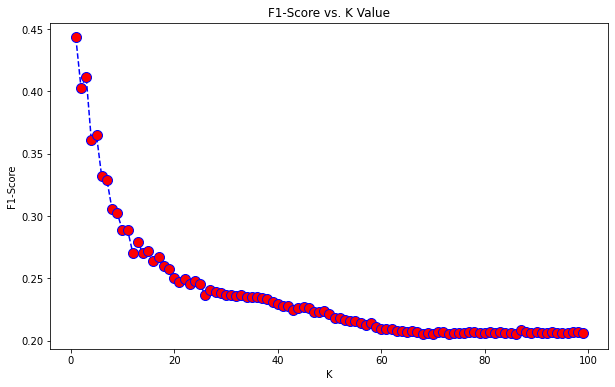

Best K value =  1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.savefig('/content/drive/MyDrive/ACM Project/k_data2-1.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.47799132052076876
F1-Score =  0.4432821864240171
[[101 326  41]
 [ 59 463 105]
 [ 18 293 207]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree_model = DecisionTreeClassifier(random_state = 0, class_weight='balanced')

In [ ]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = dtree_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5282083075015499
F1-Score =  0.5309079537749114
[[259 148  61]
 [166 277 184]
 [ 63 139 316]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4240545567265964
F1-Score =  0.34014771704254604
[[336 132   0]
 [279 348   0]
 [124 394   0]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4866707997520149
F1-Score =  0.44091725653610486
[[310 156   2]
 [188 415  24]
 [ 61 397  60]]


In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 0, class_weight='balanced')
best_clf = log_model.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

In [ ]:


param_grid = [
              {'penalty' : ['l1','l2', 'elasticnet', 'none'],
               'C' : np.logspace(-4,4,20),
               'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
               'max_iter' : [100,1000,2500,5000]
               }
]
clf = GridSearchCV(log_model, param_grid = param_grid, cv=3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 454 tasks      | elapsed: 16.5min


KeyboardInterrupt: ignored

In [ ]:
best_clf.best_estimator_

In [ ]:
y_pred = best_clf.best_estimator_.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state = 0, class_weight='balanced')

In [ ]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

# **TF-IDF Vectorizer**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ACM Project/data.csv')
df

,ID,Text,class
0,4330,nen á vist bolest vztek smutek zmatek osam ě l...,neutral
1,41616,haan yaar neha kab karega woh post usne na sac...,neutral
2,6648,television media congress ke liye nhi h ye toh...,negative
3,2512,all india me nrc lagu kare w kashmir se dhara ...,positive
4,610,who pagal hai kya they aren t real issues mand...,neutral
...,...,...,...
9132,16859,kisi ko koi khushi nahi nayi sarkaar aati naye...,negative
9133,2294,music is my life thank you to chhote ustad sal...,neutral
9134,29819,gilmour hmmmm not really sam is an outlaw so t...,neutral
9135,34181,ab gala faad ke nahi chillana chowkidaar chor ...,negative


In [ ]:
df[df['Text']==""]

,ID,Text,class


In [ ]:
df[df['Text'].isnull()]

,ID,Text,class
278,20445,NaN,neutral
299,13499,NaN,neutral
566,13432,NaN,neutral
678,16231,NaN,neutral
1943,13983,NaN,neutral
2721,3444,NaN,positive
2933,20107,NaN,neutral
3364,10405,NaN,neutral
5059,5213,NaN,neutral
5607,1762,NaN,negative


In [ ]:
for i in range(len(df)):
    if(type(df['Text'][i]) !=str):
        df['Text'][i] = df['class'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()
features2 = tfidf.fit_transform(df['Text'])

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

In [ ]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)

print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5889646621202728
F1-Score =  0.5916801896341307
[[316 119  37]
 [179 287 148]
 [ 55 125 347]]


In [65]:
param_grid = {
    'C' : [0.1, 1, 10, 100, 1000],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['rbf', 'linear', ]
}
grid = GridSearchCV(svm.SVC(), param_grid= param_grid, refit=True, verbose= 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.393, total=  12.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.387, total=  11.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.384, total=  12.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.385, total=  12.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.388, total=  12.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.490, total=  10.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.473, total=  10.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.494, total=  10.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.506, total=  10.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 46.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [67]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5846249225046497
F1-Score =  0.5889203226988321
[[274 165  33]
 [140 338 136]
 [ 43 153 331]]


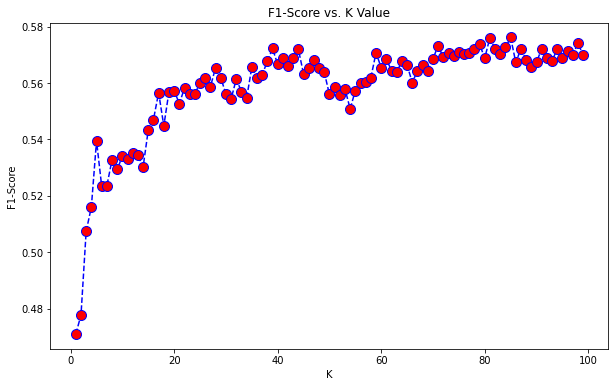

Best K value =  85


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.savefig('/content/drive/MyDrive/ACM Project/k_data2-1.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5765654060756354
F1-Score =  0.5761428560333665
[[267 148  57]
 [145 280 189]
 [ 44 100 383]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state = 0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.47427154370737756
F1-Score =  0.4766636796749138
[[249 154  69]
 [196 245 173]
 [100 156 271]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.44575325480471173
F1-Score =  0.4433938203706149
[[233 122 117]
 [187 186 241]
 [104 123 300]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.597024178549287
F1-Score =  0.5970148438658754
[[225 209  38]
 [ 81 396 137]
 [ 21 164 342]]


In [ ]:
params = {'alpha' : [0.01, 0.1, 0.5, 1.0, 10.0,],
          }
multi_nb_grid = GridSearchCV(MNB, param_grid= params, n_jobs=-1, cv=20, verbose=20)
multi_nb_grid.fit(X_train, y_train)  


Fitting 20 folds for each of 5 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0707s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  24 tas

GridSearchCV(cv=20, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=20)

In [ ]:
y_pred = multi_nb_grid.best_estimator_.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5957842529448233
F1-Score =  0.5987580618503873
[[256 174  42]
 [115 358 141]
 [ 27 153 347]]


In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5846249225046497
F1-Score =  0.586708783822528
[[316 117  39]
 [183 277 154]
 [ 57 120 350]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state = 0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

# **Word2Vec**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ACM Project/data.csv')
df

,ID,Text,class
0,4330,nen á vist bolest vztek smutek zmatek osam ě l...,neutral
1,41616,haan yaar neha kab karega woh post usne na sac...,neutral
2,6648,television media congress ke liye nhi h ye toh...,negative
3,2512,all india me nrc lagu kare w kashmir se dhara ...,positive
4,610,who pagal hai kya they aren t real issues mand...,neutral
...,...,...,...
9132,16859,kisi ko koi khushi nahi nayi sarkaar aati naye...,negative
9133,2294,music is my life thank you to chhote ustad sal...,neutral
9134,29819,gilmour hmmmm not really sam is an outlaw so t...,neutral
9135,34181,ab gala faad ke nahi chillana chowkidaar chor ...,negative


In [ ]:
df[df['Text'].isnull()]

,ID,Text,class
278,20445,NaN,neutral
299,13499,NaN,neutral
566,13432,NaN,neutral
678,16231,NaN,neutral
1943,13983,NaN,neutral
2721,3444,NaN,positive
2933,20107,NaN,neutral
3364,10405,NaN,neutral
5059,5213,NaN,neutral
5607,1762,NaN,negative


In [ ]:
for i in range(len(df)):
    if(type(df['Text'][i]) !=str):
        df['Text'][i] = df['class'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from gensim.models import Word2Vec


In [ ]:
tokenized_tweet = df['Text'].apply(lambda x: x.split()) # tokenizing

model_w2v = Word2Vec(tokenized_tweet, size=300,  window=5, min_count=1)
model_w2v.train(tokenized_tweet, total_examples= len(df['Text']), epochs=20)

(3286046, 10618680)

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:

        vec += model_w2v[word].reshape((1, size))
        count += 1.

    if count != 0:
        vec /= count
    return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 300))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 300)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(9137, 300)

In [ ]:
d = {}
d['negative'] = [1., 0., 0.]
d['neutral'] = [0., 1., 0.]
d['positive']  = [0., 0., 1.]

In [ ]:
out=[]

In [ ]:

for i in df['class']:
    out.append(d[i])
out = np.array(out)

In [ ]:

sentiment = df['class']
X_train, X_valid, y_train, y_valid  = train_test_split(
        wordvec_arrays, 
        out,
        train_size=0.85, 
        shuffle = False
       )

In [ ]:
sentiment = df['class']
X_train, X_test, y_train, y_test  = train_test_split(
        X_train, 
        y_train,
        train_size=0.82352942, 
        shuffle = False
       )

In [ ]:

def show_results(nn_model_train,s): # plot performance over the training epochs
  accuracy     = nn_model_train.history['accuracy']
  val_accuracy = nn_model_train.history['val_accuracy']
  loss         = nn_model_train.history['loss']
  val_loss     = nn_model_train.history['val_loss']
  epochs       = range(len(accuracy))
  nb_epochs    = len(epochs)

  f2 = plt.figure(2)
  plt.figure(figsize = (30,10))

  plt.subplot(2,1,1)
  plt.axis((0,nb_epochs,0.4,0.8))
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.subplot(2,1,2)
  plt.axis((0,nb_epochs,0.8,1.0))
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.savefig('/content/drive/MyDrive/ACM Project/EX-6'+s+'.png',bbox_inches='tight')
  plt.draw()
  plt.pause(0.001)

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

In [ ]:
batch_size  = 64
epochs      = 50
learning_rate = 0.0001

model = keras.Sequential()

nr_hidden = 300
nr_in     = 300
nr_out    = 3 
model.add(Dense(nr_in,activation='relu'))
model.add(Dense(nr_hidden, activation = 'relu'))
model.add(Dense(nr_hidden, activation = 'relu'))
model.add(Dense(nr_hidden-100, activation = 'relu'))
model.add(Dense(nr_hidden-100, activation = 'relu'))
model.add(Dense(nr_hidden-200, activation = 'relu'))
model.add(Dense(nr_hidden-200, activation = 'relu'))

model.add(Dense(nr_out,activation='softmax'))

opt = keras.optimizers.SGD(lr=learning_rate)
model.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:

import time
start_time = time.time()
analysis = model.fit(X_train, y_train, batch_size=batch_size,epochs=1200,verbose=1,validation_data=(X_valid, y_valid))
trainTime = (time.time() - start_time)

In [ ]:
test_eval = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('Test loss:', test_eval[0])      # this is the categorical_crossentropy
print('Test accuracy:', test_eval[1])

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1)

In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:

y_pred_one_hot = to_categorical(y_pred)

In [ ]:
print("F1-Score = ", f1_score(y_test, y_pred_one_hot, average='macro'))

In [ ]:
show_results(analysis,"W2V_MLP_1200_2")

# **CNN**

In [ ]:
batch_size  = 40
epochs      = 10
learning_rate = 0.0001
model = Sequential()

model.add(Conv1D(16, kernel_size=(3),activation='relu',padding='same'))
model.add(MaxPooling1D((4),padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(8, kernel_size=(3),activation='relu',padding='same'))
model.add(MaxPooling1D((2 ),padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

# model.summary()

opt = keras.optimizers.RMSprop(lr=learning_rate)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
print((X_train.shape))
print((X_test.shape))
print((X_valid.shape))

(6395, 300)
(1371, 300)
(1371, 300)


In [ ]:
X_train = np.expand_dims(X_train, axis=2)

In [ ]:
X_valid = np.expand_dims(X_valid, axis=2)

In [ ]:
X_valid.shape

(1371, 300, 1)

In [ ]:
import time
start_time = time.time()
analysis = model.fit(X_train, y_train, batch_size=batch_size,epochs=20,verbose=1,validation_data=(X_valid, y_valid))
trainTime = (time.time() - start_time)

Epoch 1/20
160/160 [==============================] - 31s 32ms/step - loss: 1.0817 - accuracy: 0.3876 - val_loss: 1.0220 - val_accuracy: 0.4843
Epoch 2/20
160/160 [==============================] - 4s 28ms/step - loss: 1.0109 - accuracy: 0.4743 - val_loss: 0.9808 - val_accuracy: 0.5237
Epoch 3/20
160/160 [==============================] - 5s 28ms/step - loss: 0.9783 - accuracy: 0.4987 - val_loss: 0.9624 - val_accuracy: 0.5222
Epoch 4/20
160/160 [==============================] - 4s 27ms/step - loss: 0.9616 - accuracy: 0.5094 - val_loss: 0.9506 - val_accuracy: 0.5266
Epoch 5/20
160/160 [==============================] - 4s 27ms/step - loss: 0.9522 - accuracy: 0.5078 - val_loss: 0.9477 - val_accuracy: 0.5274
Epoch 6/20
160/160 [==============================] - 5s 29ms/step - loss: 0.9379 - accuracy: 0.5260 - val_loss: 0.9398 - val_accuracy: 0.5376
Epoch 7/20
160/160 [==============================] - 5s 29ms/step - loss: 0.9350 - accuracy: 0.5324 - val_loss: 0.9354 - val_accuracy: 0.541

In [ ]:
X_test = np.expand_dims(X_test, axis=2)

In [ ]:
test_eval = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('Test loss:', test_eval[0])      # this is the categorical_crossentropy
print('Test accuracy:', test_eval[1])

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1) # Choose the prediction with the highest probability
y_pred_one_hot = to_categorical(y_pred)
print("F1-Score = ", f1_score(y_test, y_pred_one_hot, average='macro'))

In [ ]:
show_results(analysis,"W2V_CNN_100_3")